# The Sandbox

## Imports

In [8]:
import numpy as np
from scipy.stats import uniform

import plotly.graph_objects as go
from plotly.subplots import make_subplots
import plotly.io as pio

## Plotting Functions

In [3]:
# Plotting functions
def plot_data(x=None, y=None, z=None, size=None, colour=None, title="", colour_title="", x_label="", y_label="", name="", mode="markers", text="", fill=None, **traces):
    """
    General purpose function for plotting scatter plots in plotly.
    """
    fig = go.Figure(layout={
        "title": title,
        "xaxis": {"title": x_label},
        "yaxis": {"title": y_label}
    })

    marker = dict()
    
    if size is not None:
        marker["size"] = size
        marker["sizeref"] = 0.01
    if colour is not None:
        marker["color"] = colour
        marker["showscale"] = True
        marker["colorbar"] = dict(title=colour_title)
    
    if z is None:
        data = go.Scatter(
            x=x,
            y=y,
            mode=mode,
            name=name,
            text=text,
            fill=fill,
            marker=marker,
        )
    else:
        data = go.Scatter3d(
            x=x,
            y=y,
            z=z,
            mode=mode,
            name=name,
            text=text,
            marker=marker,
        )

    if x is not None and y is not None:
        fig.add_trace(data)
    
    for t in traces:
        fig.add_trace(traces[t])
    
    return fig

def create_trace(x=None, y=None, z=None, size=None, colour=None, colour_title="", name="", mode="lines", text="", fill=None):
    marker = dict()
    
    if size is not None:
        marker["size"] = size
        marker["sizeref"] = 0.01
    if colour is not None:
        marker["color"] = colour
        marker["showscale"] = True
        marker["colorbar"] = dict(title=colour_title)
    
    if z is None:
        trace = go.Scatter(
            x=x,
            y=y,
            mode=mode,
            name=name,
            text=text,
            fill=fill,
            marker=marker
        )
    else:
        trace = go.Scatter3d(
            x=x,
            y=y,
            z=z,
            mode=mode,
            name=name,
            text=text,
            marker=marker
        )
    
    return trace

def create_histogram(x=None, y=None, histnorm="", name=""):
    return go.Histogram(
        x=x,
        y=None,
        histnorm=histnorm,
        name=name,
    )

def create_candle_stick(x=None, open=None, close=None, high=None, low=None, name=""):
    return go.Candlestick(
        x=x,
        open=open,
        close=close,
        high=high,
        low=low,
        name=name,
    )

def plot_collection(plots, rows=1, cols=1, title="", subplot_titles=[], x_labels={}, y_labels={}, height=1000):
    specs = [
        [{"type": "xy"} for c in range(cols)] 
        for r in range(rows)
    ]
    
    fig = make_subplots(
        rows=rows, 
        cols=cols, 
        subplot_titles=subplot_titles,
        specs=specs,
    )
    
    fig.update_layout({
        "title": title,
        "height": height,
    })

    # Add traces
    for k in plots:
        for i in range(len(plots[k].data)):
            fig.add_trace(plots[k].data[i], row=k[0], col=k[1])

    # Update axes
    for k in plots:
        fig.update_xaxes(title_text=x_labels.get(k, ""), row=k[0], col=k[1])
        fig.update_yaxes(title_text=y_labels.get(k, ""), row=k[0], col=k[1])

    return fig

## Code

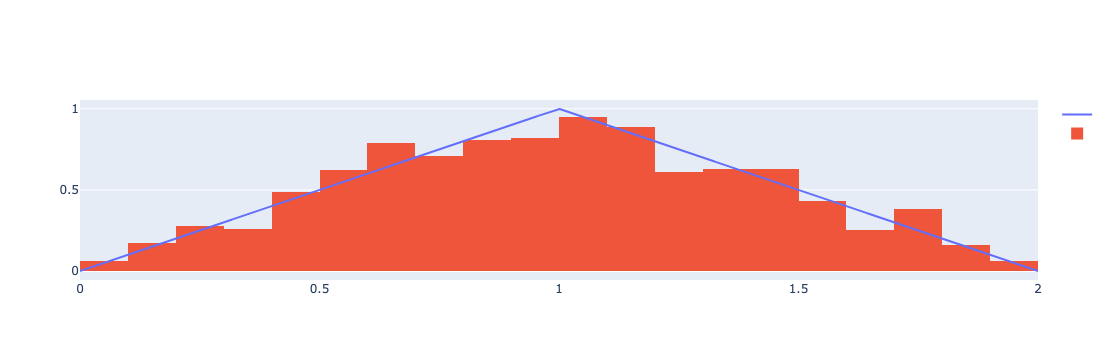

In [34]:
N = 1000
x = np.linspace(0, 2, N)
pdf1 = uniform.rvs(size=N)
pdf2 = uniform.rvs(size=N)
hist = create_histogram(pdf1 + pdf2, histnorm="probability density")
plot_data(x, np.where(x < 1, x, 2-x), mode="lines", t1=hist)